In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from pathlib import Path
import plotly.graph_objects as go

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/MyDrive/Colab Notebooks/Thesis'

In [5]:
df = pd.read_excel(f"{base_path}/data/imageAnalysis_information.xlsx")
df  = pd.DataFrame(df.values[1:], columns=df.iloc[0])
df.head()

,event_id,IBT number,genus,species,start date,end date,date of picture,image no,video,temperature,picture interval,comments,Reshape Job ID,Reshape plate position,Ofba reference list,Comments
0,ima001,IBT 12085,Penicillium,smithii,2023-02-20,2023-02-27,day 4,192,NaN,25,30 min,NaN,NaN,NaN,NaN,NaN
1,ima001,IBT 13516,Penicilluim,bilaiae,2023-02-20,2023-02-27,day 4,192,NaN,25,30 min,NaN,NaN,NaN,NaN,NaN
2,ima001,IBT 21948,Penicilluim,malodoratum,2023-02-20,2023-02-27,day 4,192,NaN,25,30 min,NaN,NaN,NaN,NaN,NaN
3,ima001,IBT 21902,Aspergillus,astellatus,2023-02-20,2023-02-27,day 4,192,NaN,25,30 min,NaN,NaN,NaN,NaN,NaN
4,ima001,NID174,Aspergillus,nidulans,2023-02-20,2023-02-27,day 4,192,NaN,25,30 min,NaN,NaN,NaN,NaN,NaN


In [6]:
# Strip the blank spaces from names
df['species'] = df['species'].str.strip()
df['genus'] = df['genus'].str.strip()

In [7]:
# Count the occurrences
species_count = df['species'].value_counts()
genus_count = df['genus'].value_counts()
date_of_count = df['date of picture'].value_counts()
image_number_count = df['image no'].value_counts()


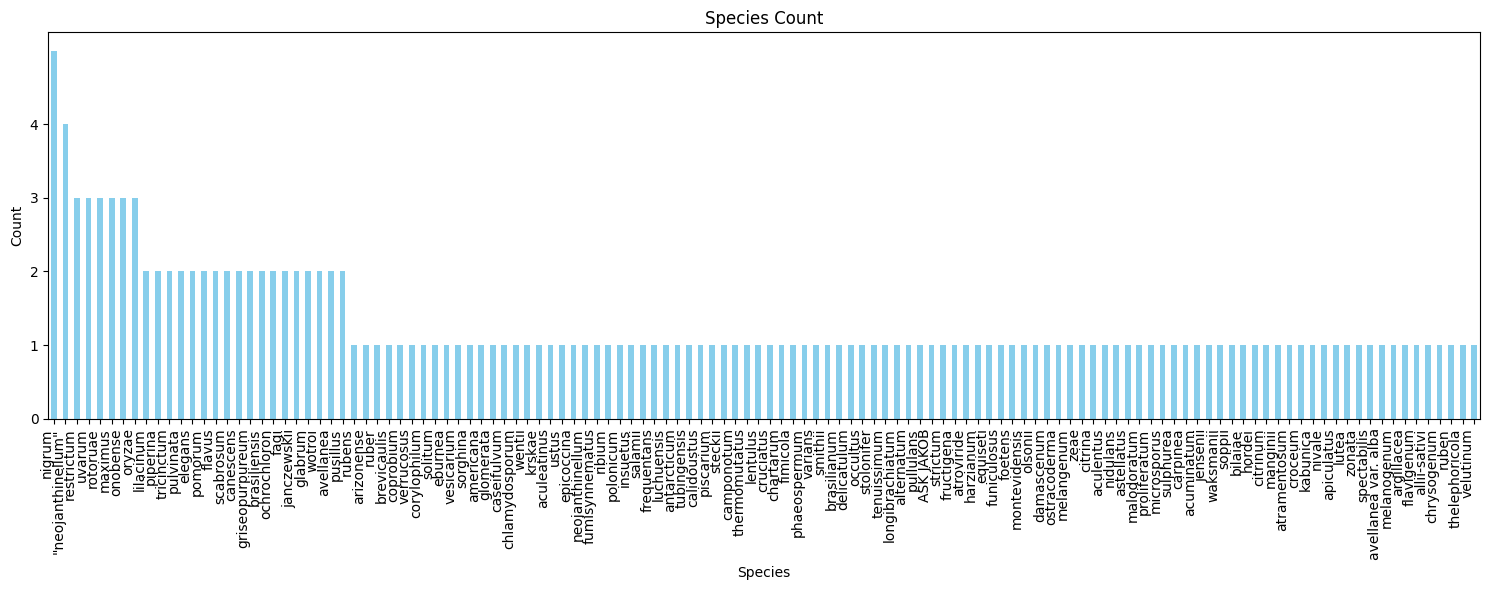

In [8]:
plt.figure(figsize=(15, 6))

# Plot for species count
species_count.plot(kind='bar', color='skyblue')
plt.title('Species Count')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.yticks([0,1,2,3,4])

plt.tight_layout()
plt.show()
#Add table on the side

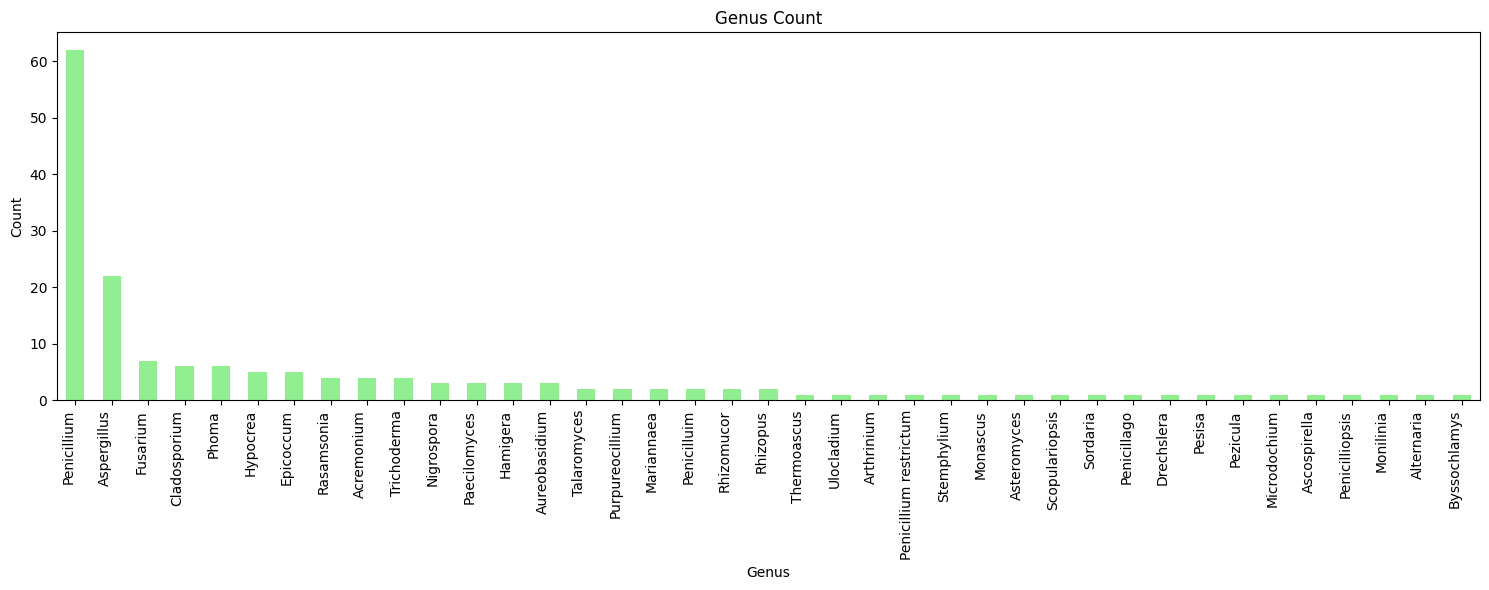

In [9]:
plt.figure(figsize=(15, 6))

# Plot for genus count
genus_count.plot(kind='bar', color='lightgreen', )
plt.title('Genus Count')
plt.xlabel('Genus')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()

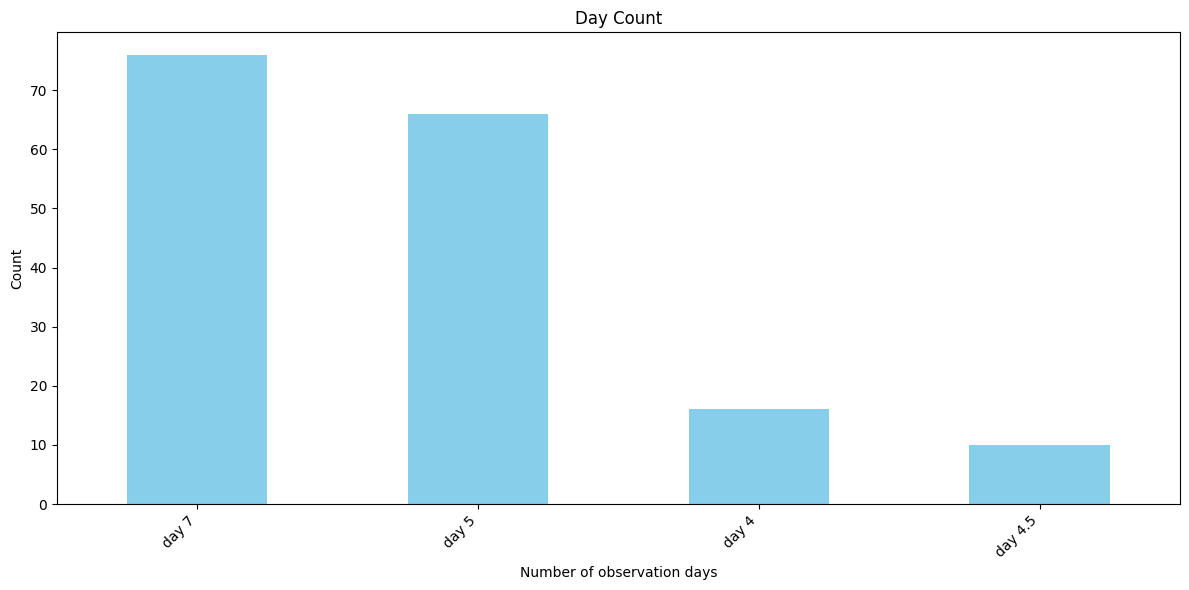

In [10]:
plt.figure(figsize=(12, 6))

# Plot for days of observation count
date_of_count.plot(kind='bar', color='skyblue')
plt.title('Day Count')
plt.xlabel('Number of observation days')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

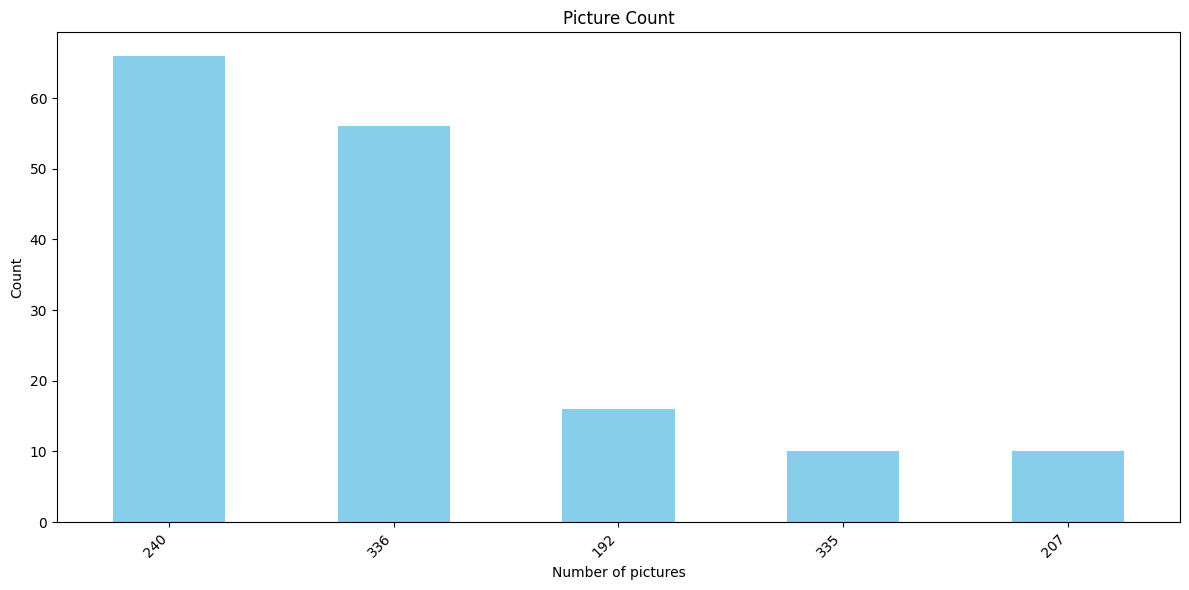

In [11]:
plt.figure(figsize=(12, 6))

# Plot for number of pictures count
image_number_count.plot(kind='bar', color='skyblue')
plt.title('Picture Count')
plt.xlabel('Number of pictures')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [12]:
# Group species by genus and count the number of species
genus_species_count_table = df.groupby('genus')['species'].agg(['count']).reset_index()

# Calculate the total count of species
total_species_count = genus_species_count_table['count'].sum()

# Create a DataFrame for the total count
sum_row = pd.DataFrame({'genus': ['Total'], 'count': [total_species_count]})

# Concatenate the total count row
genus_species_count_table = pd.concat([genus_species_count_table, sum_row], ignore_index=True)
genus_species_count_table

,genus,count
0,Acremonium,3
1,Alternaria,0
2,Arthrinium,1
3,Ascospirella,1
4,Aspergillus,22
5,Asteromyces,1
6,Aureobasidium,3
7,Byssochlamys,1
8,Cladosporium,3
9,Drechslera,0


In [13]:
genus_species_count = df.groupby('genus')['species'].agg(['count']).reset_index()

genus_species_count = genus_species_count[genus_species_count['genus'] != 'Total']

fig = go.Figure(go.Treemap(
    labels=genus_species_count['genus'],
    parents=[''] * len(genus_species_count['genus']),
    values=genus_species_count['count'],
    textinfo="label+value"
))

fig.update_layout(
    title="Genus-Species Relationship",
    treemapcolorway=["SkyBlue", "LightGray"],  # Adjust colors as needed
)

fig.show()

In [14]:
date_genus_count = df.groupby(['date of picture', 'species']).size().reset_index(name='count')

fig = go.Figure()

for category in date_genus_count['date of picture'].unique():
    data_category = date_genus_count[date_genus_count['date of picture'] == category]
    fig.add_trace(go.Bar(
        x=data_category['species'],
        y=data_category['count'],
        name=category
    ))

fig.update_layout(
    title="Length of obeservation for each Genus",
    xaxis_title="Species",
    yaxis_title="Number of experiments",
    barmode='stack'  # To stack bars for different categories
)

fig.show()